# __Responsible AI: Individual Fairness Metrics__

In this notebook, you will apply individual fairness, as 'fairness through unawareness', to a tabular dataset.

__Dataset:__ 

Select one of the following datasets:

- [German Credit Risk](https://www.kaggle.com/uciml/german-credit)
- [COMPAS](https://www.kaggle.com/danofer/compass)
- [UCI Adult Income](https://www.kaggle.com/wenruliu/adult-income-dataset)

__Documentation:__
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)
- [scikit-learn](https://scikit-learn.org/stable/index.html)
- [dython](http://shakedzy.xyz/dython/)

__Learning Objectives:__
- Import Python packages/libraries
- Apply necessary pre-processing techniques to the dataset
- Identify protected/sensitive attribute(s) in the dataset
- Apply 'Fairness through unawareness' techniques to the input of the ML model
- Select appropriate ML model to fit on the dataset
- Evaluate the performace of the ML model




### __1. Virtual Environment & Google Colaboratory (Optional)__ 

__Step 1:__ Open the Anaconda prompt.

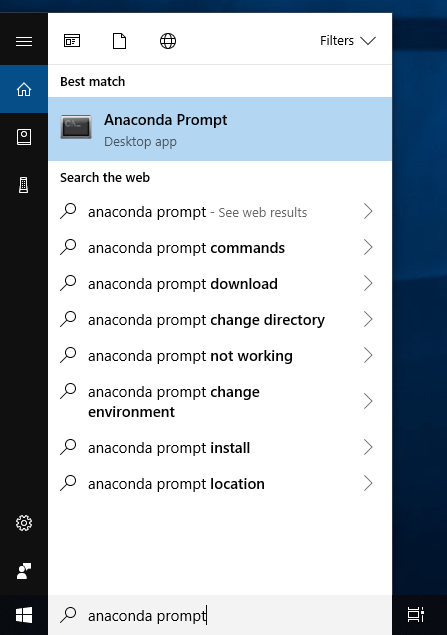

__Step 2:__ Create, and activate an Anaconda environment by copy/pasting the following piece of code into the prompt:

In [ ]:
conda create -n respai_individual python=3.8 
conda activate respai_individual

__Step 3:__ Install the neccesary packages in your ennvironment. For example: 

In [ ]:
pip install -r requirements.txt

__Step 4:__ Create a Google Colaboratory account via: https://colab.research.google.com. 

__Step 5:__ Open this notebook in Google Colaboratory, and select 'GPU' as a runtime.

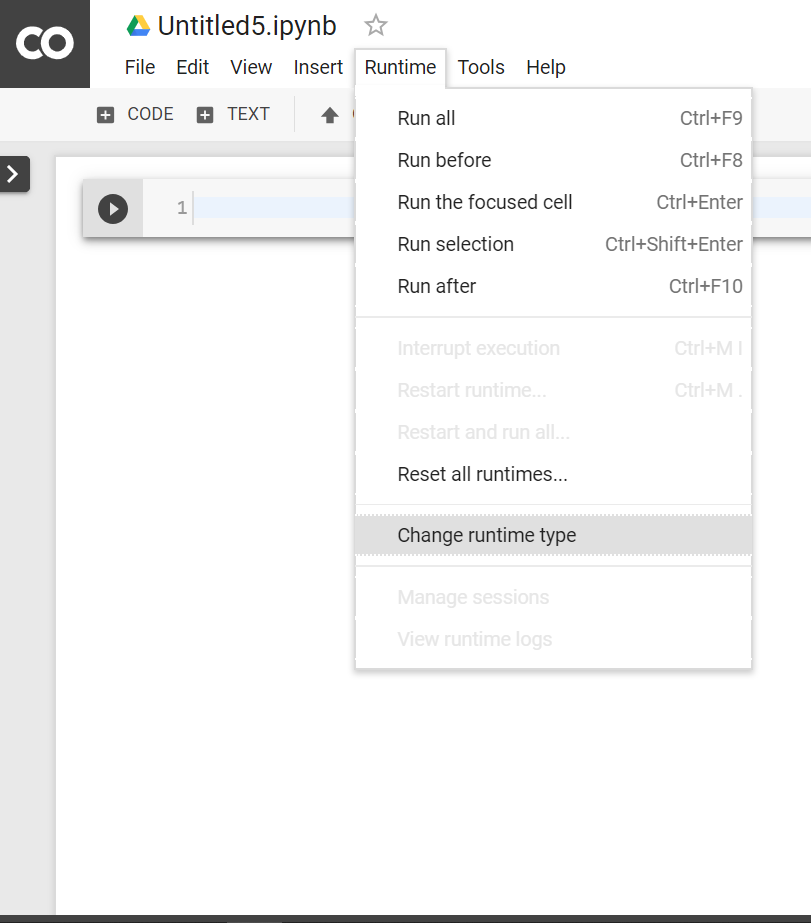

__Step 5:__ Follow Google's tutorial to connect your Colab notebook to a local GPU runtime: https://research.google.com/colaboratory/local-runtimes.html 

###__2. Preproccessing__

__Step 1:__ Install, and subsequently import the necessary Python packages, set your working directory, and load the dataset.

In [ ]:
#Load neccesary Python packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [ ]:
#Set working directory
path='C:/Users/Public/data/aif360_data'

os.chdir(path)

In [ ]:
#Load the German Credit data, and remove redundant column
data = pd.read_csv(r'.\german_credit_data.csv', header=0) 

del data['Unnamed: 0']
print(data.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


<AxesSubplot:>

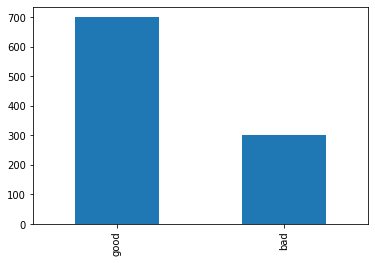

In [ ]:
#Distribution target variable 'Risk'
data['Risk'].value_counts().plot(kind='bar')

__Step 2:__ Partition the dataset into a train, and test set. Use the following variable names: ```X_train```, ```X_test```, ```y_train```, and  ```y_test```.

In [ ]:
#Partition dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Risk']), 
                                                    data['Risk'], 
                                                    test_size=.25, random_state = 1234)

__Step 3:__ Select an appropriate ML algorithm for the classification task, and apply neccesary preprocessing techniques to the dataset. Elaborate on your approach.

For a tutorial on how to create sklearn (preprocessing) pipelines, see [How to Use Sklearn Pipelines For Ridiculously Neat Code](https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d). 

In [ ]:
#Recode the target variable to a numeric data type 
numeric_transformer_y = LabelEncoder()
y_train = numeric_transformer_y.fit_transform(np.ravel(y_train))
y_test = numeric_transformer_y.fit_transform(np.ravel(y_test))

In [ ]:
#Select an appropriate ML algorithm for the binary classification task 
#Proprocess your dataset (e.g. recoding of variables, dealing with missing values etc.)
#Sklearn pipelines tutorial: https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d
numeric_transformer_X = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer_X = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_X', numeric_transformer_X, make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat_X', categorical_transformer_X, make_column_selector(dtype_include=['object', 'bool']))])

preprocessor.fit_transform(X_train)

model = LogisticRegression(class_weight='balanced')

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                  ('model', model)])  
                  
classifier = model_pipeline.fit(X_train, y_train)

In [ ]:
#Describe or depict the preprocessing steps (a.k.a pipeline)
set_config(display="diagram")

classifier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_X',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002173B2D0F70>),
                                                 ('cat_X',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002173B2D0FA0>)])),
                ('model', LogisticRegression(class_weight='balanced'))])

### __3. Model Training, and Evaluation__

__Step 1:__ Train, and evaluate the ML model. 

In [ ]:
#Make prediction on test set
y_pred = classifier.predict(X_test)

C:\Users\blerck.i\Anaconda3\envs\respai_individual\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


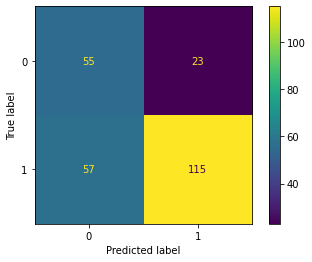

In [ ]:
#Vizualize the outcome of the model in a confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:
#Calculate performance metrics
target_names = ['Good', 'Bad']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.49      0.71      0.58        78
         Bad       0.83      0.67      0.74       172

    accuracy                           0.68       250
   macro avg       0.66      0.69      0.66       250
weighted avg       0.73      0.68      0.69       250



__Step 2:__ Identify the feature(s) that might cause bias in the dataset (e.g., ethnicity, language, age, gender, etc.). These features are commonly referred to as sensitive/protected attributes. 

Additionally, it might be necessary to remove all the features that are highly correlated (score > 0.7) with these sensitive/protected attributes: 

> Bias often appears in AI systems through factors like race or gender that aren't directly inputted into the system, but still have a strong influence on their decisions. Discrimination can happen when one of these attributes is strongly correlated with information that is directly used by the system. For example, suppose a system that makes decisions about credit uses zip code as a factor to make its decisions. The direct information about race is not given to the system, but zip code is strongly correlated with race since many neighborhoods are still segregated. By using zip code, the system would be indirectly making decisions based on race. In this case, zip code is a proxy for race ([Source](https://engineering.cmu.edu/news-events/news/2018/12/11-datta-proxies.html)).

The following code block uses dython, and:

> ... calculates the correlation/strength-of-association of features in the dataset with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases ([Source](https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/)).

To calculate the correlations matrix, and create a heat map, run the code below:  

[]


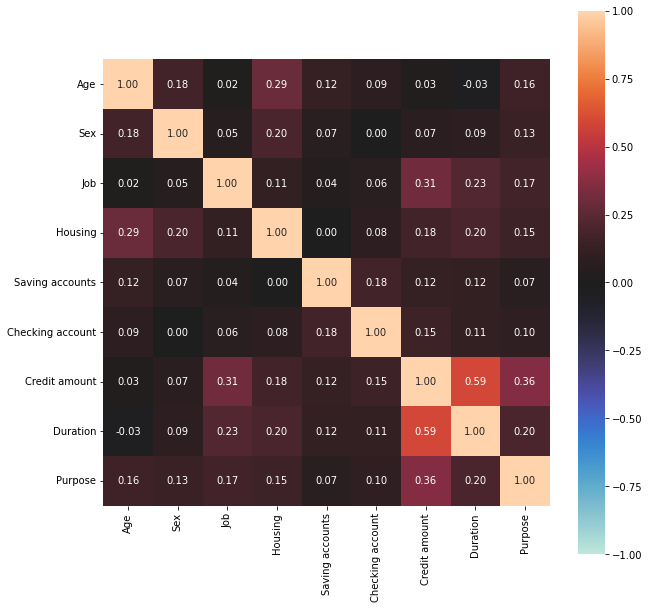

In [ ]:
#Identify the categorical features
categorical_features = identify_nominal_columns(y_train)
print(categorical_features)

#Generate correlation matrix, and heat map.
complete_correlation= associations(X_train, filename= 'complete_correlation.png', figsize=(10,10))


__Step 3:__ Remove the sensitive/protected attribute(s), and all its/their highly correlated feature(s).  

In [ ]:
#Remove features
X_train = X_train.drop(columns=['Sex'])
X_test = X_test.drop(columns=['Sex'])

__Step 4:__ Retrain, and reevaluate the model.  

In [ ]:
#Select an appropriate ML algorithm for the binary classification task 
#Proprocess your dataset (e.g. recoding of variables, dealing with missing values etc.)
#Sklearn pipelines tutorial: https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d
numeric_transformer_X = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer_X = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_X', numeric_transformer_X, make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat_X', categorical_transformer_X, make_column_selector(dtype_include=['object', 'bool']))])

preprocessor.fit_transform(X_train)

model = LogisticRegression(class_weight='balanced')

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                  ('model', model)])  
                  
classifier = model_pipeline.fit(X_train, y_train)

In [ ]:
#Make prediction on test set
y_pred = classifier.predict(X_test)

C:\Users\blerck.i\Anaconda3\envs\respai_individual\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


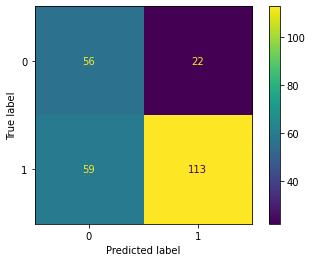

In [ ]:
#Vizualize the outcome of the model in a confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:
#Calculate performance metrics
target_names = ['Good', 'Bad']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.49      0.72      0.58        78
         Bad       0.84      0.66      0.74       172

    accuracy                           0.68       250
   macro avg       0.66      0.69      0.66       250
weighted avg       0.73      0.68      0.69       250



Step 5: Give at least one advantage and disadvantage of applying 'fairness through unawareness' to the dataset.

Add your text.

## __The End__

![Alt Text](https://media0.giphy.com/media/27Y1W0GCKQtDq/giphy.gif) 

__Title - Individual Fairness Metrics__
<br> __Author - Irene van Blerck__
<br> __Created On - 8 Februari 2022__